In [1]:
%matplotlib inline

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster",font_scale=1.3)
import folium  #画世界地图

import os,sys
import numpy as np
import pandas as pd

import pivottablejs
import missingno as msno#缺失值可视化
import pandas_profiling#可以以网页的形式展现给你数据总体概况


In [53]:
data = pd.read_csv('../../数据集/农粮数据/aquastat.csv.gzip',compression='gzip')
data.head()

,country,region,variable,variable_full,time_period,year_measured,value
0,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1958-1962,1962.0,65286.0
1,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1963-1967,1967.0,65286.0
2,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1968-1972,1972.0,65286.0
3,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1973-1977,1977.0,65286.0
4,Afghanistan,World | Asia,total_area,Total area of the country (1000 ha),1978-1982,1982.0,65286.0


In [54]:
simple_regions = {
    'World | Asia':'Asia',
       'Americas | Central America and Caribbean | Central America':'North America',
       'Americas | Central America and Caribbean | Greater Antilles':'North America',
       'Americas | Central America and Caribbean | Lesser Antilles and Bahamas':'North America',
       'Americas | Northern America | Northern America':'North America',
       'Americas | Northern America | Mexico':'North America',
       'Americas | Southern America | Guyana':'South America',
       'Americas | Southern America | Andean':'South America',
       'Americas | Southern America | Brazil':'South America',
       'Americas | Southern America | Southern America':'South America',
       'World | Africa':'Africa',
       'World | Europe':'Europe', 
       'World | Oceania':'Oceania'
}

In [55]:
data.region = data.region.apply(lambda x:simple_regions[x])

In [56]:
data

,country,region,variable,variable_full,time_period,year_measured,value
0,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1958-1962,1962.0,65286.0
1,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1963-1967,1967.0,65286.0
2,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1968-1972,1972.0,65286.0
3,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1973-1977,1977.0,65286.0
4,Afghanistan,Asia,total_area,Total area of the country (1000 ha),1978-1982,1982.0,65286.0
...,...,...,...,...,...,...,...
143275,Vanuatu,Oceania,urban_pop_access_drinking,Urban population with access to safe drinking-...,1993-1997,1997.0,95.0
143276,Vanuatu,Oceania,urban_pop_access_drinking,Urban population with access to safe drinking-...,1998-2002,2002.0,96.1
143277,Vanuatu,Oceania,urban_pop_access_drinking,Urban population with access to safe drinking-...,2003-2007,2007.0,97.2
143278,Vanuatu,Oceania,urban_pop_access_drinking,Urban population with access to safe drinking-...,2008-2012,2012.0,98.3


In [3]:
def time_slice(df,time_period):
    df = df[df.time_period == time_period]
    df = df.pivot(index = 'country',columns = 'variable',values='value')
    # 根据列对数据表进行重塑
    # index是重塑的新表的索引名称是什么
    # 第二个columns是重塑的新表的列名称是什么
    # values就是生成新列的值应该是多少
    df.columns.name=time_period
    return df

In [4]:
recent = time_slice(data,'2013-2017')
recent

2013-2017,accounted_flow,accounted_flow_border_rivers,agg_to_gdp,arable_land,avg_annual_rain_depth,avg_annual_rain_vol,cultivated_area,dam_capacity_per_capita,dependency_ratio,exploitable_irregular_renewable_surface,...,total_flow_border_rivers,total_pop,total_pop_access_drinking,total_renewable,total_renewable_groundwater,total_renewable_per_capita,total_renewable_surface,urban_pop,urban_pop_access_drinking,water_total_external_renewable
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,19.00,9.00,22.6000,7771.0,327.0,213.5000,7910.0,61.76,28.7200,NaN,...,33.4,32527.00,55.3,65.3300,10.650,2008.00,55.68,8547.0,78.2,18.18
Albania,3.30,0.00,22.0500,615.6,1485.0,42.6900,696.0,1391.00,10.9300,NaN,...,0.0,2897.00,95.1,30.2000,6.200,10425.00,26.35,1835.0,94.9,3.30
Algeria,0.39,0.00,13.0500,7469.0,89.0,212.0000,8439.0,209.30,3.5990,NaN,...,0.0,39667.00,83.6,11.6700,1.517,294.20,10.15,28739.0,84.3,0.42
Andorra,NaN,NaN,0.5239,2.8,NaN,0.4724,2.8,NaN,NaN,NaN,...,NaN,70.47,100.0,0.3156,NaN,4479.00,NaN,68.9,100.0,NaN
Angola,0.40,0.00,NaN,4900.0,1010.0,1259.0000,5190.0,377.50,0.2695,NaN,...,0.0,25022.00,49.0,148.4000,58.000,5931.00,145.40,10052.0,75.4,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),520.00,25.00,NaN,2700.0,2044.0,1864.0000,3400.0,5066.00,39.2500,NaN,...,50.0,31108.00,93.1,1325.0000,227.000,42594.00,1303.00,27848.0,95.0,520.00
Viet Nam,524.70,0.00,16.9900,6410.0,1821.0,602.7000,10232.0,NaN,59.3500,NaN,...,0.0,93448.00,97.6,884.1000,71.420,9461.00,847.70,31372.0,99.1,524.70
Yemen,0.00,0.00,NaN,1248.0,167.0,88.1700,1546.0,NaN,0.0000,NaN,...,0.0,26832.00,NaN,2.1000,1.500,78.26,2.00,8837.0,NaN,0.00


In [5]:
recent[['total_pop','urban_pop','rural_pop']].describe().astype(int) #总人口，城镇人口，农村人口

2013-2017,total_pop,urban_pop,rural_pop
count,199,199,199
mean,36890,19849,17040
std,140720,69681,77461
min,0,0,-98
25%,1368,822,500
50%,7595,3967,2404
75%,25088,11656,10677
max,1407306,805387,891112


In [6]:
recent.sort_values('rural_pop')[['total_pop','urban_pop','rural_pop']].head()

2013-2017,total_pop,urban_pop,rural_pop
country,,,
Qatar,2235.00,2333.00,-98.00
Singapore,5604.00,5619.00,-15.00
Monaco,37.73,38.32,-0.59
Holy See,0.80,0.80,0.00
Nauru,10.22,10.12,0.10


In [8]:
def time_series(df,country,variable):
    series = df[(df.country == country) & (df.variable == variable)]
    series = series.dropna()[['year_measured','value']]
    
    series.year_measured = series.year_measured.astype(int)#可用于转化dateframe某一列的数据类型
    series.set_index('year_measured',inplace=True)
    series.columns = [variable]
    return series

In [9]:
time_series(data,'Qatar','total_pop').join(time_series(data,'Qatar','urban_pop')).join(time_series(data,'Qatar','rural_pop'))

,total_pop,urban_pop,rural_pop
year_measured,,,
1962,56.19,48.39,7.80
1967,86.16,75.48,10.68
1972,130.40,115.60,14.80
1977,182.40,162.40,20.00
1982,277.20,248.60,28.60
1987,423.30,385.40,37.90
1992,489.70,459.10,30.60
1997,528.20,506.50,21.70
2002,634.40,608.90,25.50


## 数据分布是倾斜的
## 有异常值
## 有不连续的

### 偏度

#### 左偏：均值<中位数(均值在哪边，就是哪偏)

#### 右偏：均值>中位数

In [10]:
# 计算偏度
import scipy
recent[['total_pop','urban_pop','rural_pop']].apply(scipy.stats.skew)

2013-2017
total_pop    8.519379
urban_pop    8.545690
rural_pop    9.490029
dtype: float64

## 正态分布的偏度应为零，负偏度表示左偏，正偏表示右偏

In [11]:
recent[['total_pop','urban_pop','rural_pop']].apply(scipy.stats.kurtosis)

2013-2017
total_pop    76.923725
urban_pop    85.499659
rural_pop    95.838930
dtype: float64

峰度也是一个正态分布和只能是正值，不能为负

Text(0.5, 1.0, 'Distribution of population of countries 2013-2017')

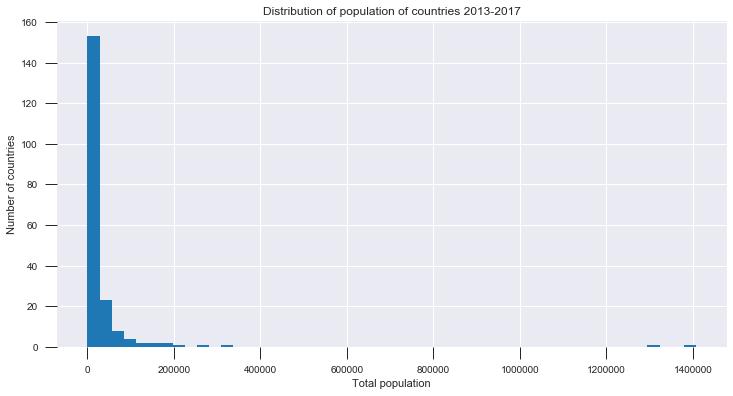

In [12]:
fig,ax=plt.subplots(figsize=(12,6))
ax.hist(recent.total_pop.values,bins=50)
ax.set_xlabel('Total population')
ax.set_ylabel('Number of countries')
ax.set_title('Distribution of population of countries 2013-2017')

In [14]:
recent[['total_pop']].apply(np.log).apply(scipy.stats.skew)

2013-2017
total_pop   -0.899063
dtype: float64

In [15]:
recent[['total_pop']].apply(np.log).apply(scipy.stats.kurtosis)

2013-2017
total_pop    1.086877
dtype: float64

In [16]:
def plot_hist(df,variable,bins=20,xlabel=None,by=None,ylabel=None,title=None,logx=False,ax=None):
    if not ax:
        fig,ax=plt.subplots(figsize=(12,8))
    if logx:
        if df[variable].min()<=0:
            df[variable] = df[variable] -df[variable].min()+1
            print('Warning:data<=0 exists,data transformed by %0.2g before plotting' % (-df[variable].min()))
        bins = np.logspace(np.log10(df[variable].min()),np.log10(df[variable].max()),bins)#返回数以对数刻度均匀分布。
        ax.set_xscale("log")
    ax.hist(df[variable].dropna().values,bins=bins)
    
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)
    
    return ax

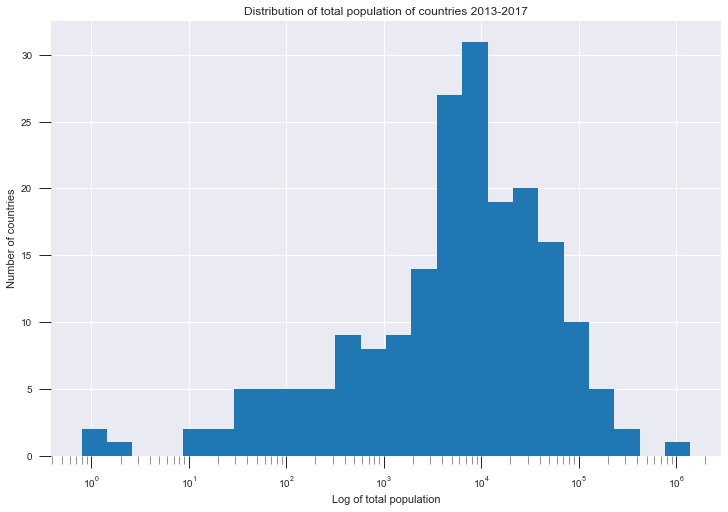

In [17]:
plot_hist(recent,'total_pop',bins=25,logx=True,xlabel='Log of total population',ylabel='Number of countries',
         title='Distribution of total population of countries 2013-2017')

## 数据分析维度

In [22]:
#提取单个区域
def subregion(data,region):
    data = data[data.region == region]
    return data

In [18]:
recent['population_density']=recent.total_pop.divide(recent.total_area)#人口密度：总人口数/总面积

Text(0.5, 1.0, 'United States population over time')

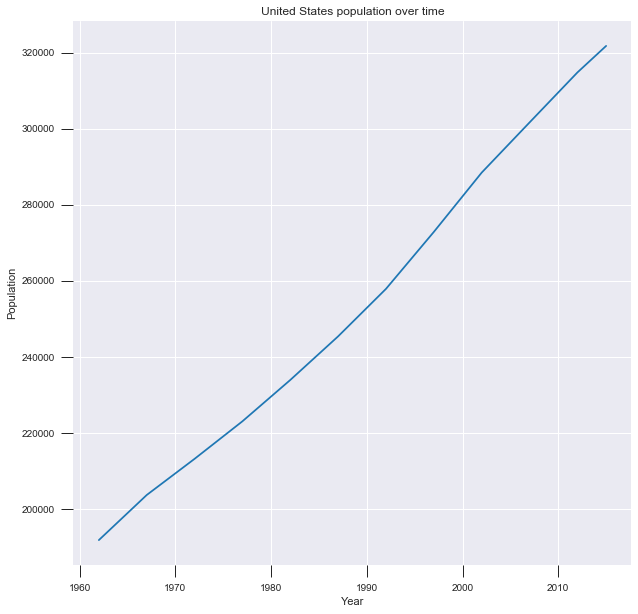

In [41]:
plt.figure(figsize=(10,10))
plt.plot(time_series(data,'United States of America','total_pop'))
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('United States population over time')

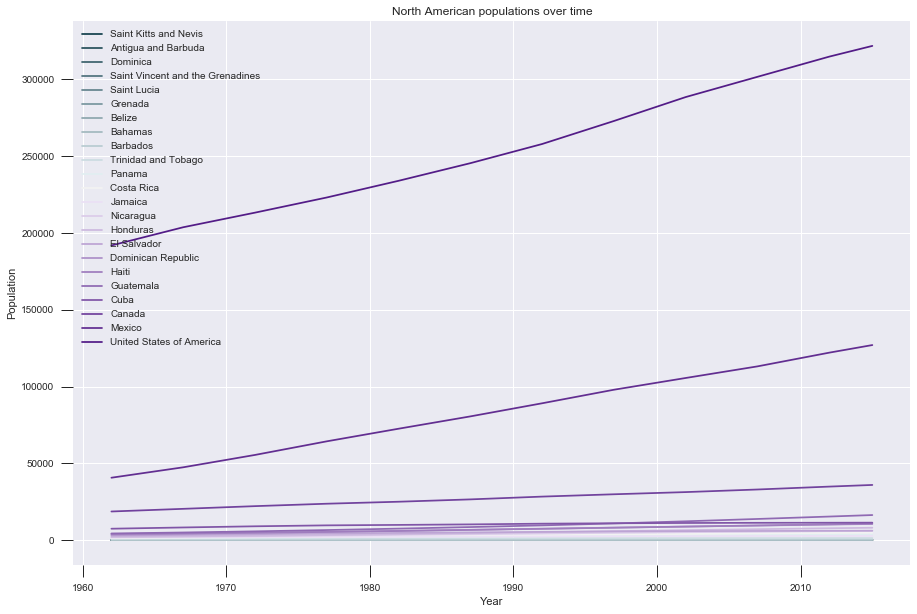

In [39]:
plt.figure(figsize=(15, 10))
with sns.color_palette(sns.diverging_palette(220,280,s=85,l=25,n=23)):
    north_america = time_slice(subregion(data,'North America'),'1958-1962').sort_values('total_pop').index.tolist()
    for country in north_america:
        plt.plot(time_series(data,country,'total_pop'),label=country)
        plt.xlabel('Year')
        plt.ylabel('Population')
        plt.title('North American populations over time')

    plt.legend(loc=2,prop={'size':10})

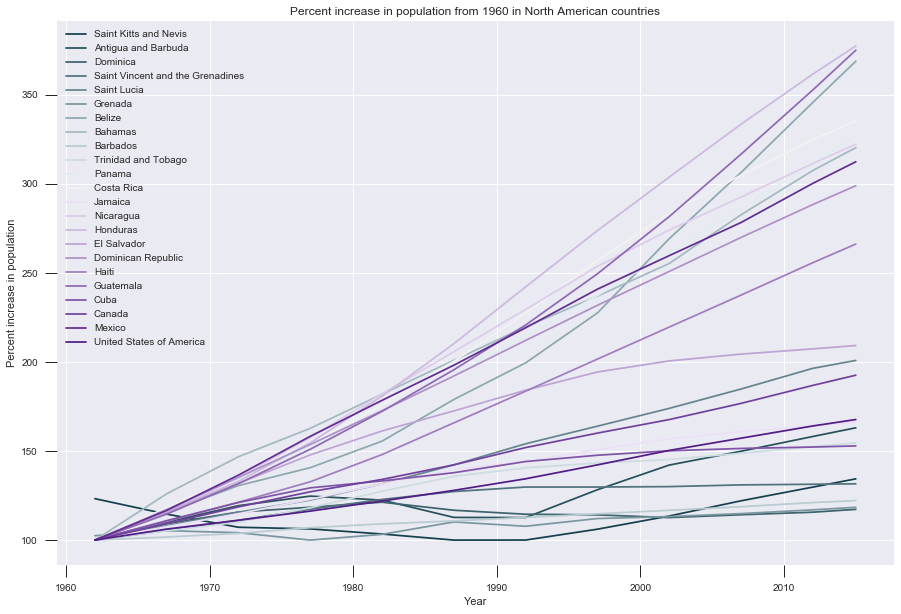

In [42]:
plt.figure(figsize=(15, 10))
with sns.color_palette(sns.diverging_palette(220,280,s=85,l=25,n=23)):
    for country in north_america:
        ts=time_series(data,country,'total_pop')
        ts['norm_pop']=ts.total_pop/ts.total_pop.min()*100
        plt.plot(ts['norm_pop'],label=country)
        plt.xlabel('Year')
        plt.ylabel('Percent increase in population')
        plt.title('Percent increase in population from 1960 in North American countries')

    plt.legend(loc=2,prop={'size':10})

In [46]:
def variable_slice(df,variable):
    df = df[df.variable == variable]
    df = df.pivot(index = 'country',columns='time_period',values='value')
    df.index.name='country'
    return df

In [60]:
north_america_pop = variable_slice(subregion(data,'North America'),'total_pop')
north_america_norm_pop = north_america_pop.div(north_america_pop.min(axis=1),axis=0)*100
north_america_norm_pop = north_america_norm_pop.loc[north_america]

Text(0.5, 1, 'Percent increase in population from 1960')

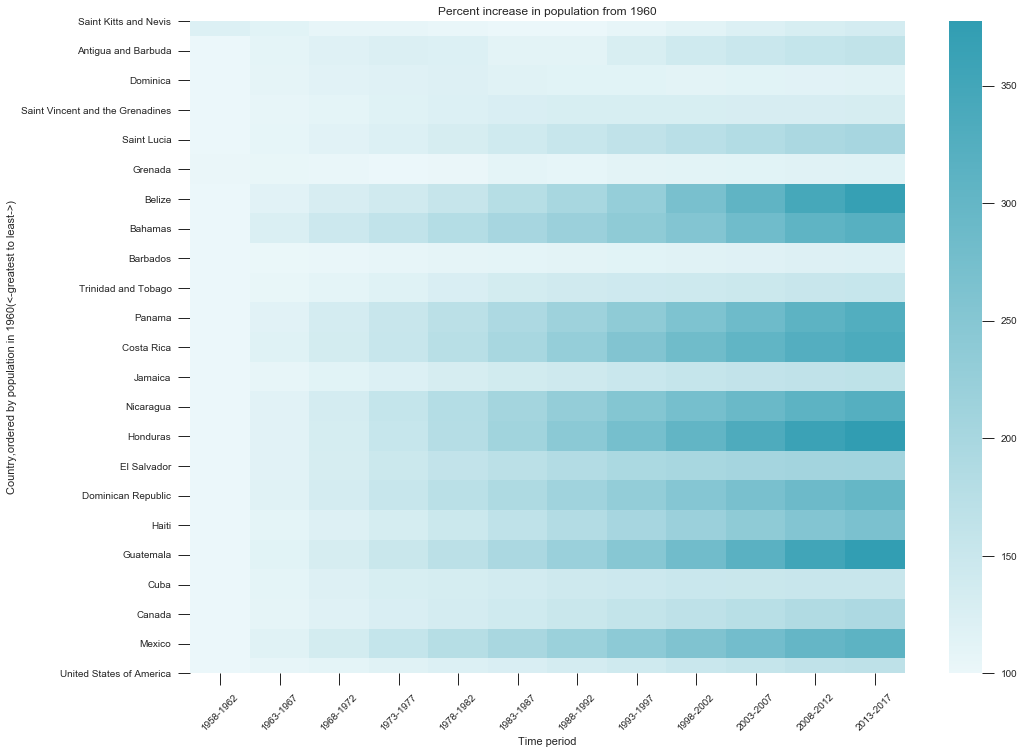

In [61]:
fig,ax = plt.subplots(figsize=(16,12))
sns.heatmap(north_america_norm_pop,ax=ax,cmap=sns.light_palette((214,90,60),input="husl",as_cmap=True))
plt.xticks(rotation=45)
plt.xlabel('Time period')
plt.ylabel('Country,ordered by population in 1960(<-greatest to least->)')
plt.title('Percent increase in population from 1960')

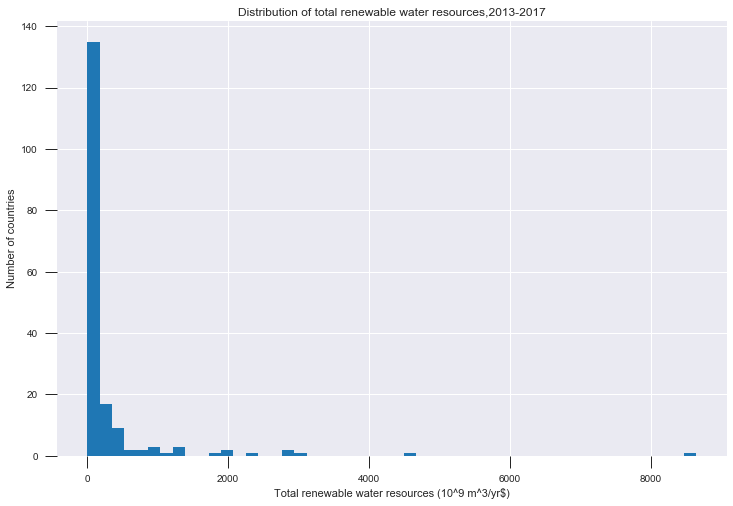

In [62]:
plot_hist(recent,'total_renewable',bins=50,
         xlabel='Total renewable water resources (10^9 m^3/yr$)',
         ylabel='Number of countries',
         title='Distribution of total renewable water resources,2013-2017')

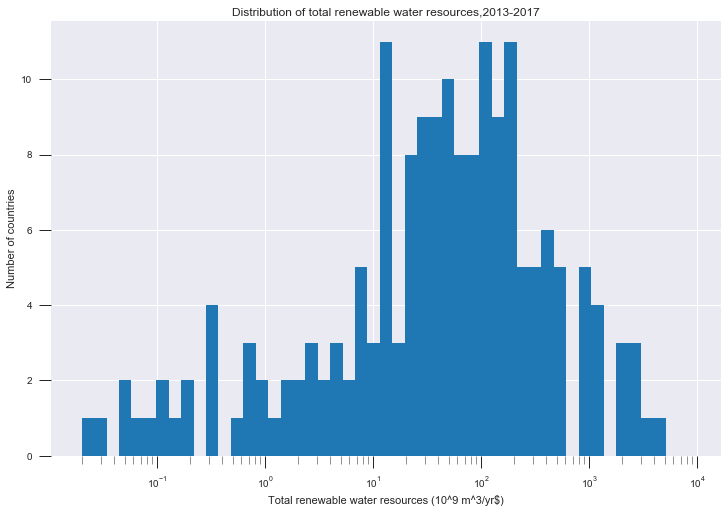

In [63]:
plot_hist(recent,'total_renewable',bins=50,
         xlabel='Total renewable water resources (10^9 m^3/yr$)',
         ylabel='Number of countries',logx=True,
         title='Distribution of total renewable water resources,2013-2017')

In [64]:
north_america_renew = variable_slice(subregion(data,'North America'),'total_renewable')


Text(0.5, 1, 'Total renewable water resources increase in population from 1960')

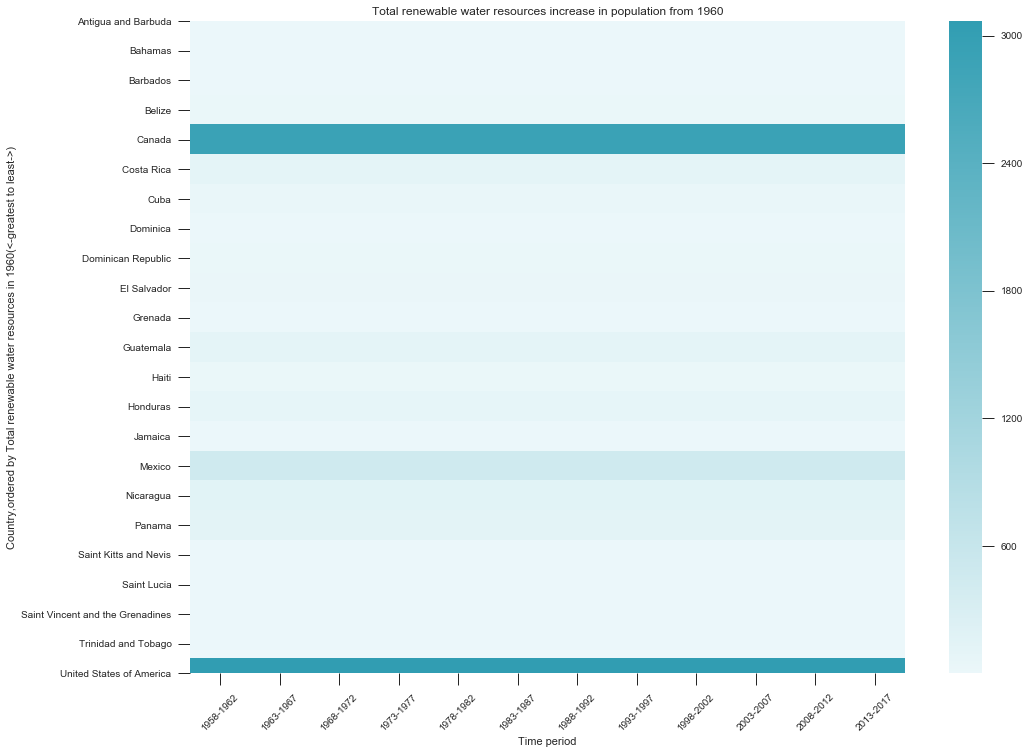

In [65]:
fig,ax = plt.subplots(figsize=(16,12))
sns.heatmap(north_america_renew,ax=ax,cmap=sns.light_palette((214,90,60),input="husl",as_cmap=True))
plt.xticks(rotation=45)
plt.xlabel('Time period')
plt.ylabel('Country,ordered by Total renewable water resources in 1960(<-greatest to least->)')
plt.title('Total renewable water resources increase in population from 1960')

# 变量关系可视化展示

随着季节变化，人均GDP的变化情况

In [66]:
data=data.loc[~data.variable.str.contains('exploitable')]
data=data.loc[~(data.variable=='national_rainfall_index')]

Text(0, 0.5, 'GDP per capita ($USD/person)')

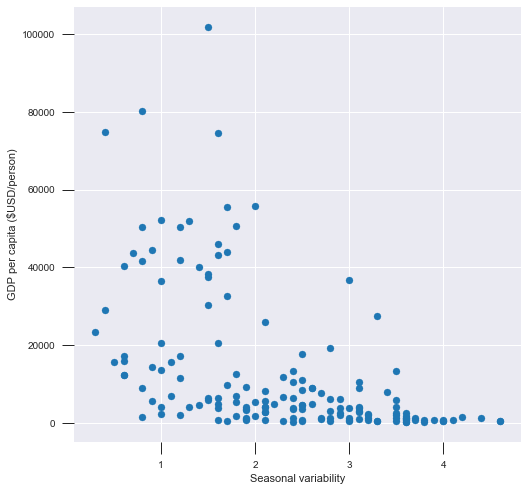

In [69]:
plt.figure(figsize=(8,8))
plt.scatter(recent.seasonal_variability,recent.gdp_per_capita)
plt.xlabel('Seasonal variability')
plt.ylabel('GDP per capita ($USD/person)')

In [71]:
def plot_scatter(df,x,y,bins=20,xlabel=None,ylabel=None,title=None,ax=None,logx=False,logy=False):
    if not ax:
        fig,ax=plt.subplots(figsize=(12,8))
    colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
    if by:
        groups = df.groupby(by)
        for j,(name,group) in enumerate(groups):
            ax.scatter(group[x],group[y],color=colors[j],label=name)
        ax.legend()
    else:
        ax.scatter(df[x],df[y],color=colors[0])
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    ax.set_xlabel(xlabel if xlabel else x)
    ax.set_ylabel(ylabel if ylabel else y)
    if title:
        ax.set_title(title)
    
    return ax

In [72]:
svr = [recent.seasonal_variability.min(),recent.seasonal_variability.max()]
gdpr = [recent.gdp_per_capita.min(),recent.gdp_per_capita.max()]
gdpbins = np.logspace(*np.log10(gdpr),25)

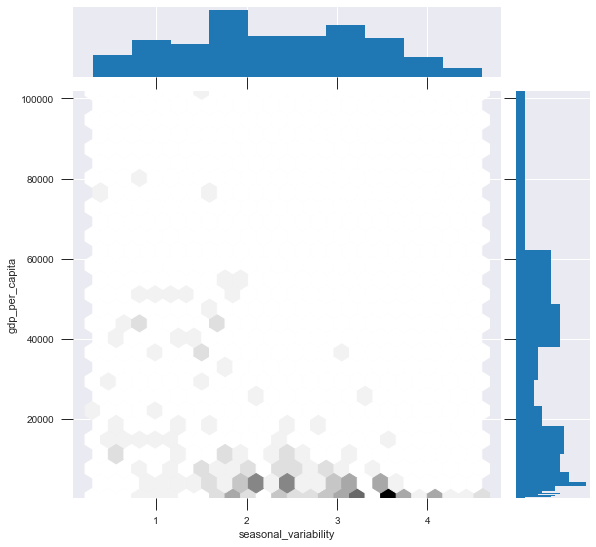

In [74]:
g = sns.JointGrid(x="seasonal_variability",y="gdp_per_capita",data=recent,ylim=gdpr)
g.ax_marg_x.hist(recent.seasonal_variability,range=svr)
g.ax_marg_y.hist(recent.gdp_per_capita,range=gdpr,bins=gdpbins,orientation="horizontal")
g.plot_joint(plt.hexbin,gridsize=25)
ax = g.ax_joint

g.fig.set_figheight(8)
g.fig.set_figwidth(9)

相关度量两个变量之间的线性关系的强度。我们可以使用相关性来识别变量

In [76]:
recent_corr = recent.corr().loc['gdp_per_capita'].drop(['gdp','gdp_per_capita'])

In [79]:
def conditional_bar(series,bar_colors=None,color_labels=None,figsize=(13,24),
                   xlabel=None,by=None,ylabel=None,title=None):
    fig,ax = plt.subplots(figsize=figsize)
    if not bar_colors:
        bar_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color'][0]
    plt.barh(range(len(series)),series.values,color=bar_colors)
    plt.xlabel('' if not xlabel else xlabel)
    plt.ylabel('' if not ylabel else ylabel)
    plt.yticks(range(len(series)),series.index.tolist())
    plt.title('' if not title else title)
    plt.ylim([-1,len(series)])
    if color_labels:
        for col,lab in color_labels.items():
            plt.plot([],linestyle='',marker='s',c=col,label=lab)
        lines,labels=ax.get_legend_handles_labels()
        ax.legend(lines[-len(color_labels.keys()):],labels[-len(color_labels.keys()):],loc='upper right')
    plt.close()
    return fig

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


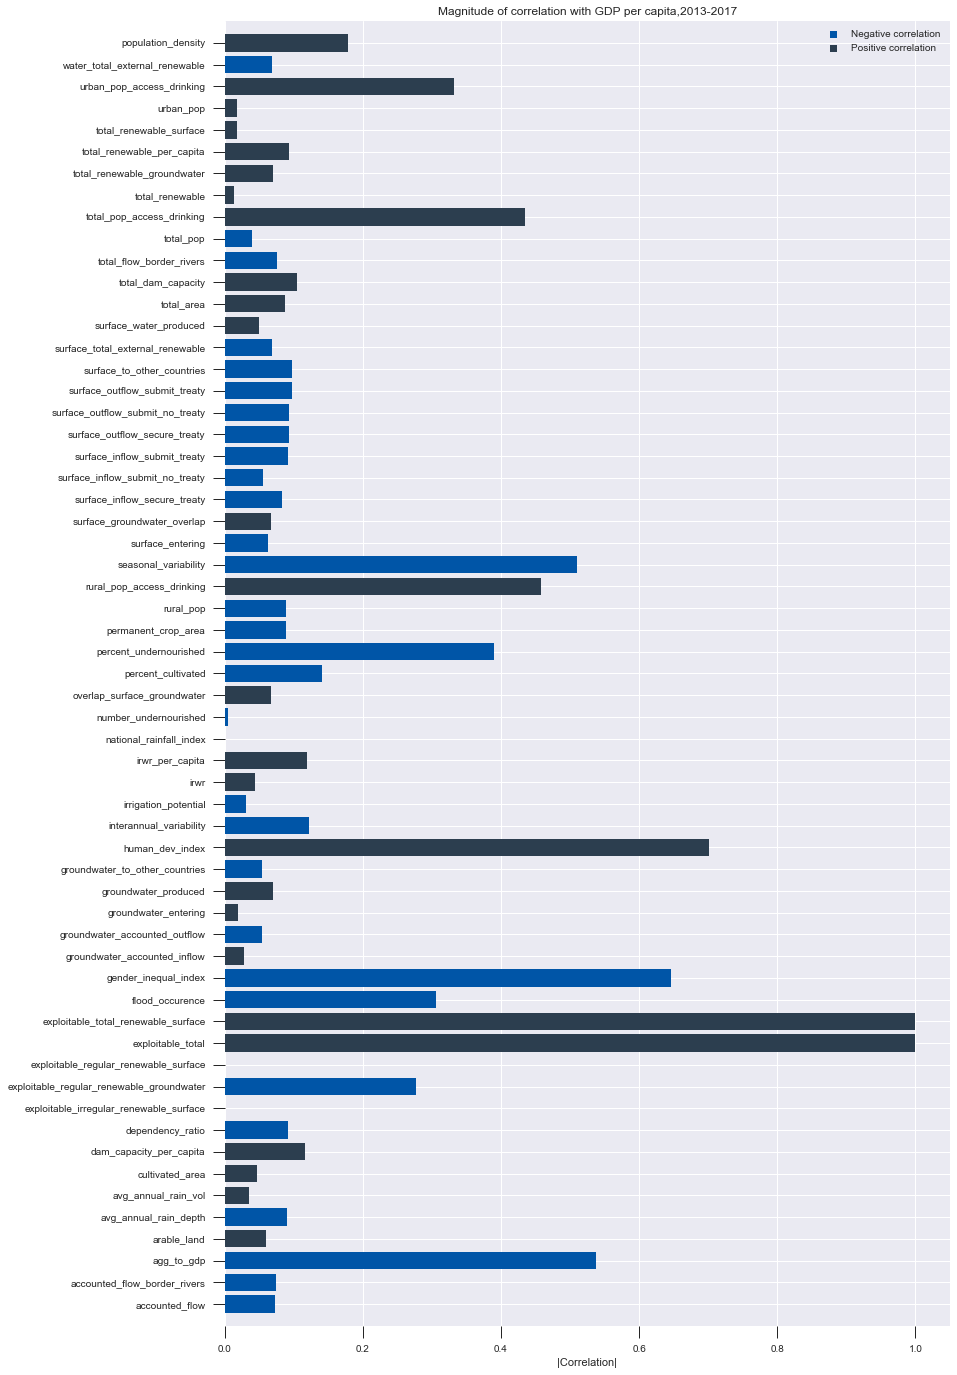

In [80]:
bar_colors = ['#0055A7' if x else '#2C3E4F' for x in list(recent_corr.values<0)]
color_labels = {'#0055A7':'Negative correlation','#2C3E4F':'Positive correlation'}

conditional_bar(recent_corr.apply(np.abs),bar_colors,color_labels,
               title='Magnitude of correlation with GDP per capita,2013-2017',
               xlabel='|Correlation|')

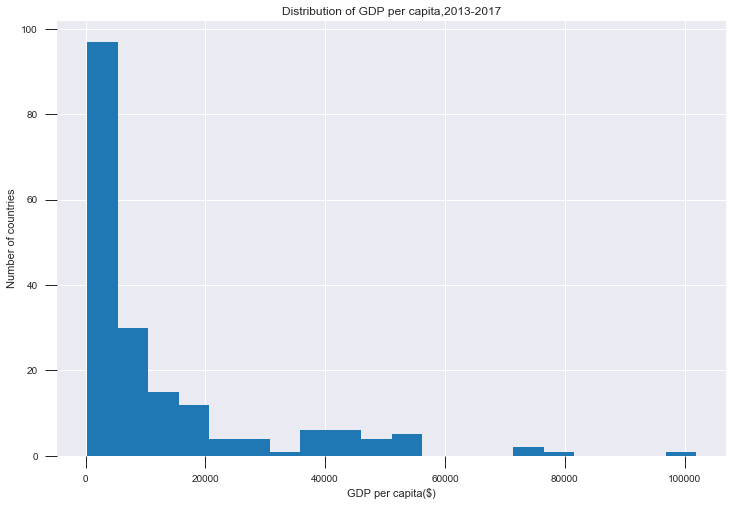

In [81]:
plot_hist(recent,'gdp_per_capita',xlabel='GDP per capita($)',
         ylabel='Number of countries',
         title='Distribution of GDP per capita,2013-2017')

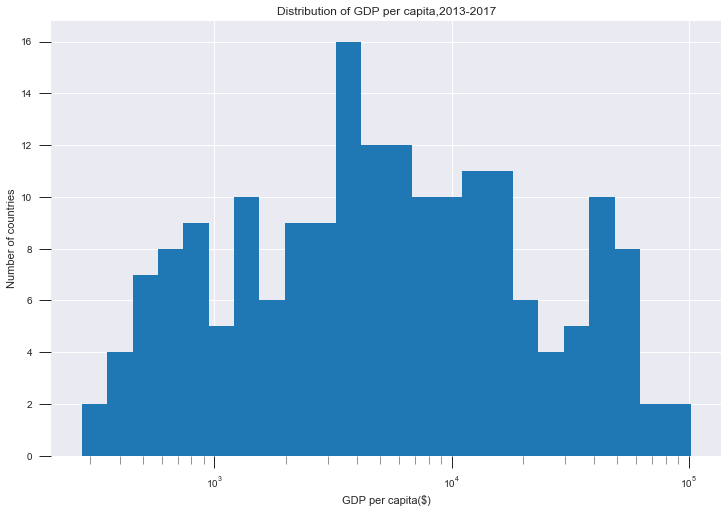

In [85]:
plot_hist(recent,'gdp_per_capita',xlabel='GDP per capita($)',logx=True,
         ylabel='Number of countries',bins=25,
         title='Distribution of GDP per capita,2013-2017')

In [86]:
capita_bins = ['Very low','Low','Medium','High','Very high']
recent['gdp_bin'] = pd.qcut(recent.gdp_per_capita,5,capita_bins)
bin_ranges = pd.qcut(recent.gdp_per_capita,5).unique()

In [112]:
def plot_hist_div(df,variable,bins=None,xlabel=None,by=None,ylabel=None,title=None,logx=False,ax=None):
    if not ax:
        fig,ax=plt.subplots(figsize=(12,8))
    if logx:
        bins = np.logspace(np.log10(df[variable].min()),np.log10(df[variable].max()),bins)#返回数以对数刻度均匀分布。
        ax.set_xscale("log")
    if by:
        if type(df[by].unique()) == pd.Categorical:
            cats = df[by].unique().categories.tolist()
        else:
            cats = df[by].unique().tolist()
        for cat in cats:
            to_plot = df[df[by] == cat][variable].dropna()
            ax.hist(to_plot,bins=bins)
    else:
        ax.hist(df[variable].dropna().values,bins=bins)
    
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if title:
        ax.set_title(title)
    
    return ax

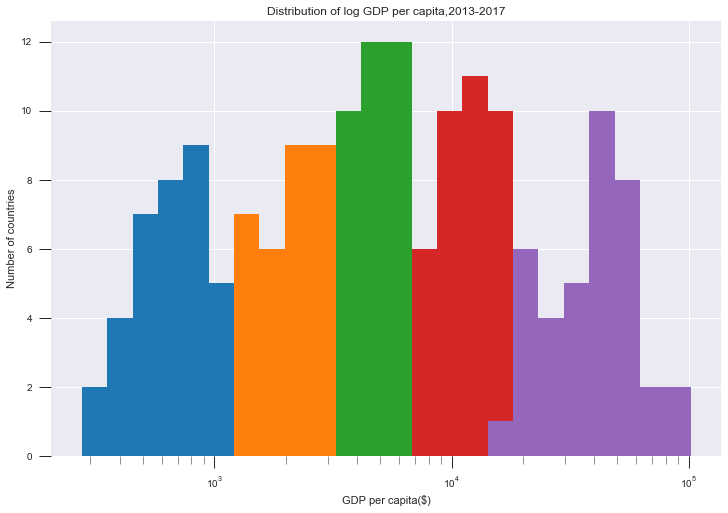

In [113]:
plot_hist_div(recent,'gdp_per_capita',xlabel='GDP per capita($)',logx=True,
         ylabel='Number of countries',bins=25,by='gdp_bin',
         title='Distribution of log GDP per capita,2013-2017')

Text(0, 0.5, 'Total population of country')

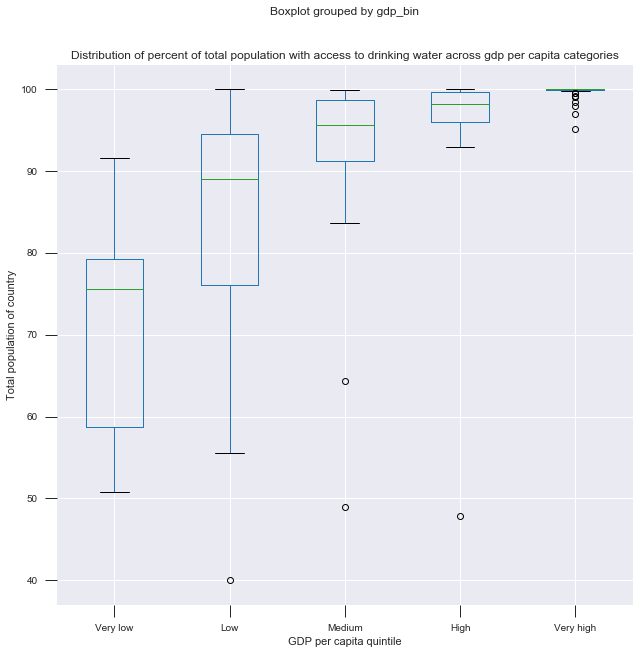

In [109]:
recent[['gdp_bin','total_pop_access_drinking']].boxplot(by='gdp_bin',figsize=(10,10))
plt.title('Distribution of percent of total population with access to drinking water across gdp per capita categories')
plt.xlabel('GDP per capita quintile')
plt.ylabel('Total population of country')

In [110]:
def mult_boxplots(df,variable,category,
                 xlabel=None,ylabel=None,
                 title=None,ylim=None):
    df[[variable,category]].boxplot(by=category,figsize=(10,10))
    
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    if ylim:
        plt.ylim(ylim)

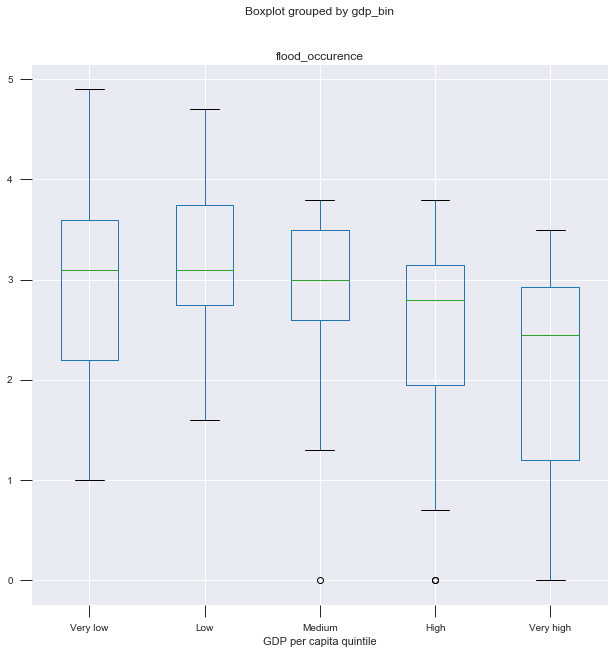

In [111]:
mult_boxplots(recent,'flood_occurence','gdp_bin',
             xlabel='GDP per capita quintile')